In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

#Money Supply

In [3]:
def fetch_money_supply(start_date, end_date):
    # Define the list of money supply series to fetch
    money_supply_series = ['M1SL', 'M2SL']

    # Fetch money supply data using pandas_datareader
    money_supply_data = pdr.get_data_fred(money_supply_series, start_date, end_date)

    # Calculate the YoY percentage change
    money_supply_data['M1SL_YoY'] = money_supply_data['M1SL'].pct_change(12) * 100
    money_supply_data['M2SL_YoY'] = money_supply_data['M2SL'].pct_change(12) * 100

    return money_supply_data

# Example usage
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2022, 1, 1)
money_supply_data = fetch_money_supply(start_date, end_date)

# Print the last few rows of the fetched data
print(money_supply_data[['M1SL_YoY', 'M2SL_YoY']].tail())

             M1SL_YoY   M2SL_YoY
DATE                            
2021-09-01  15.778094  12.849015
2021-10-01  15.429908  12.745941
2021-11-01  15.000767  12.491227
2021-12-01  14.963006  12.738564
2022-01-01  13.300256  11.391745


In [3]:
def plot_money_supply_yoy(money_supply_data):
    # Create a plot with YoY changes of M1 and M2
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=money_supply_data.index, y=money_supply_data['M1SL_YoY'], name='M1SL YoY Change'))
    fig.add_trace(go.Scatter(x=money_supply_data.index, y=money_supply_data['M2SL_YoY'], name='M2SL YoY Change'))

    fig.update_layout(
        title='Year-over-Year Changes of M1 and M2 Money Supply',
        xaxis_title='Date',
        yaxis_title='YoY Change (%)',
        xaxis_rangeslider_visible=True
    )

    fig.show()

# Example usage
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2022, 1, 1)
money_supply_data = fetch_money_supply(start_date, end_date)

# Plot the YoY changes of M1 and M2 money supply
plot_money_supply_yoy(money_supply_data)

NameError: name 'go' is not defined

#Yield curve

In [4]:
def fetch_yield_curve(start_date, end_date):
    # Fetch US 10-Year Treasury Yield and Effective Federal Funds Rate from FRED
    yield_curve = pdr.get_data_fred(['GS10', 'FEDFUNDS'], start_date, end_date)

    return yield_curve

In [5]:
def plot_yield_curve(yield_curve):
    # Calculate the yield spread (10-Year Treasury Yield - Effective Federal Funds Rate)
    yield_curve['Yield_Spread'] = yield_curve['GS10'] - yield_curve['FEDFUNDS']

    # Plot the yield spread
    plt.figure(figsize=(12, 6))
    plt.plot(yield_curve.index, yield_curve['Yield_Spread'], label='Yield Spread')
    plt.title('US Yield Curve Spread (10-Year Treasury Yield - Effective Federal Funds Rate)')
    plt.xlabel('Date')
    plt.ylabel('Basis Points')
    plt.legend()
    plt.grid(True)
    plt.show()

Yield Curve Data:
            GS10  FEDFUNDS
DATE                      
2007-01-01  4.76      5.25
2007-02-01  4.72      5.26
2007-03-01  4.56      5.26
2007-04-01  4.69      5.25
2007-05-01  4.75      5.25
...          ...       ...
2023-06-01  3.75      5.08
2023-07-01  3.90      5.12
2023-08-01  4.17      5.33
2023-09-01  4.38      5.33
2023-10-01  4.80      5.33

[202 rows x 2 columns]


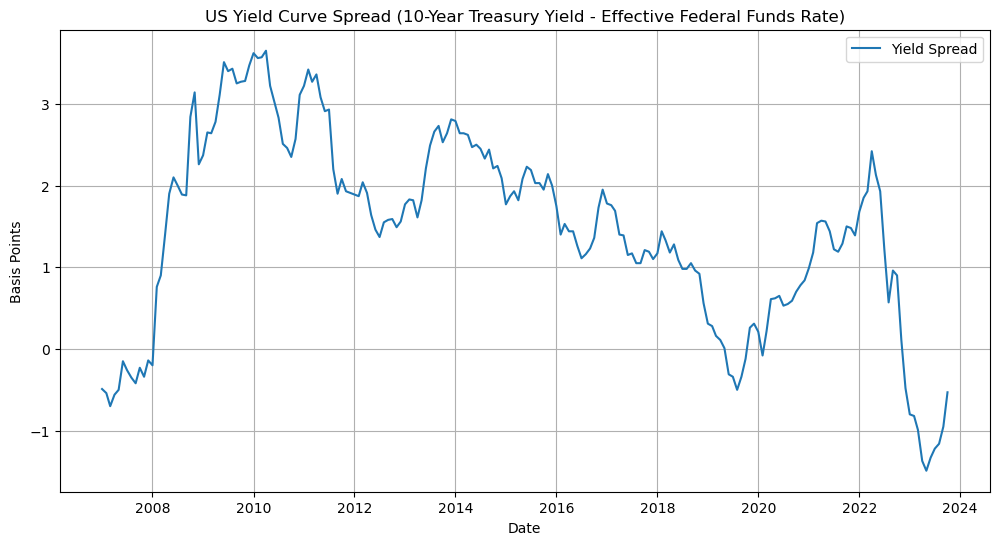

In [6]:
# Fetch and plot the yield curve from FRED
yield_curve = fetch_yield_curve('2007-01-01','2023-10-01')
print("Yield Curve Data:")
print(yield_curve)

plot_yield_curve(yield_curve)


#Unemployment

In [7]:
def fetch_unemployment_data(start_date, end_date):
    try:
        # Define the ticker symbol for the U.S. unemployment rate (UNRATE)
        unemployment_ticker = "UNRATE"

        # Fetch unemployment data from FRED
        unemployment_data = pdr.get_data_fred(unemployment_ticker, start=start_date, end=end_date)

        return unemployment_data
    except Exception as e:
        return None  # Return None if there is an error

# Example usage:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

unemployment_data = fetch_unemployment_data(start_date, end_date)

if unemployment_data is not None:
    print(unemployment_data)
else:
    print("Failed to fetch unemployment data.")


            UNRATE
DATE              
2006-01-01     4.7
2006-02-01     4.8
2006-03-01     4.7
2006-04-01     4.7
2006-05-01     4.6
...            ...
2022-09-01     3.5
2022-10-01     3.7
2022-11-01     3.6
2022-12-01     3.5
2023-01-01     3.4

[205 rows x 1 columns]


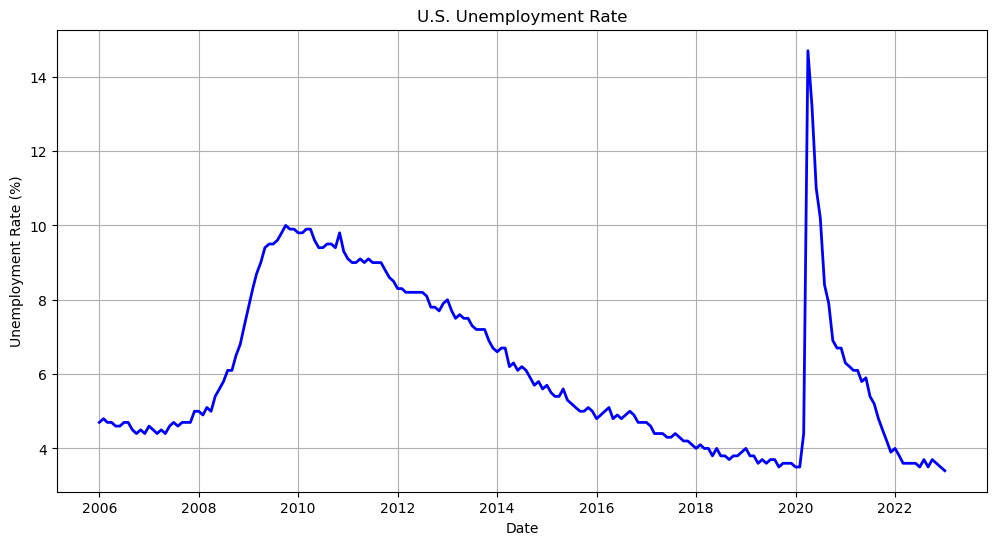

In [8]:
def plot_unemployment_data(start_date, end_date):
    unemployment_data = fetch_unemployment_data(start_date, end_date)

    if unemployment_data is not None:
        # Plot the unemployment rate data
        plt.figure(figsize=(12, 6))
        plt.plot(unemployment_data, color='blue', lw=2)
        plt.title('U.S. Unemployment Rate')
        plt.xlabel('Date')
        plt.ylabel('Unemployment Rate (%)')
        plt.grid(True)
        plt.show()
    else:
        print("Failed to fetch unemployment data.")

# Example usage:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

plot_unemployment_data(start_date, end_date)

#CPI

In [9]:
def fetch_cpi_annual_change(start_date, end_date):
    try:
        # Fetch U.S. Consumer Price Index (CPI) data from FRED
        cpi_data = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)

        if not cpi_data.empty:
            # Calculate annual percentage change
            cpi_data['Annual_Change'] = cpi_data['CPIAUCSL'].pct_change(12) * 100

            return cpi_data[['Annual_Change']]
        else:
            return None  # Return None if there is no data
    except Exception as e:
        return None  # Return None if there is an error

# Example usage:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 10, 1)

cpi_annual_change_data = fetch_cpi_annual_change(start_date, end_date)

if cpi_annual_change_data is not None:
    print(cpi_annual_change_data)
else:
    print("Failed to fetch CPI data.")


            Annual_Change
DATE                     
2006-01-01            NaN
2006-02-01            NaN
2006-03-01            NaN
2006-04-01            NaN
2006-05-01            NaN
...                   ...
2023-05-01       4.128844
2023-06-01       3.092003
2023-07-01       3.299075
2023-08-01       3.707504
2023-09-01       3.689903

[213 rows x 1 columns]


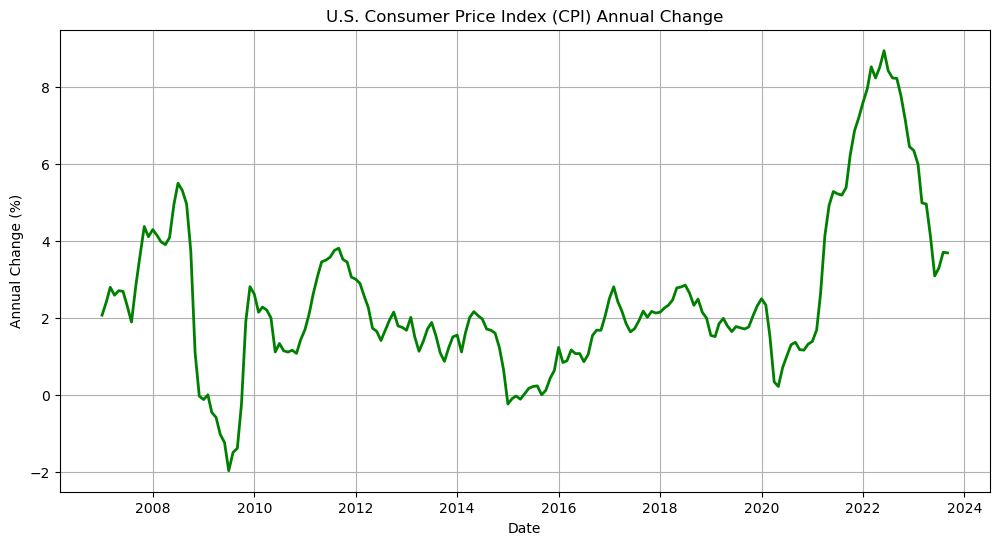

In [10]:
def plot_cpi_annual_change(start_date, end_date):
    cpi_annual_change_data = fetch_cpi_annual_change(start_date, end_date)

    if cpi_annual_change_data is not None:
        # Plot the annual percentage change of CPI
        plt.figure(figsize=(12, 6))
        plt.plot(cpi_annual_change_data, color='green', lw=2)
        plt.title('U.S. Consumer Price Index (CPI) Annual Change')
        plt.xlabel('Date')
        plt.ylabel('Annual Change (%)')
        plt.grid(True)
        plt.show()
    else:
        print("Failed to fetch CPI data.")

# Example usage:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 10, 1)

plot_cpi_annual_change(start_date, end_date)

#Interest rate

In [11]:
def fetch_fed_interest_rate(start_date, end_date):
    try:
        # Fetch Federal Reserve interest rate data (FEDFUNDS) from FRED
        fed_interest_rate = pdr.get_data_fred('FEDFUNDS', start=start_date, end=end_date)

        if not fed_interest_rate.empty:
            return fed_interest_rate
        else:
            return None  # Return None if there is no data
    except Exception as e:
        return None  # Return None if there is an error

# Example usage:

start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 10, 1)

fed_interest_rate_data = fetch_fed_interest_rate(start_date, end_date)

if fed_interest_rate_data is not None:
    print(fed_interest_rate_data)
else:
    print("Failed to fetch Federal Reserve interest rate data.")


            FEDFUNDS
DATE                
2006-01-01      4.29
2006-02-01      4.49
2006-03-01      4.59
2006-04-01      4.79
2006-05-01      4.94
...              ...
2023-06-01      5.08
2023-07-01      5.12
2023-08-01      5.33
2023-09-01      5.33
2023-10-01      5.33

[214 rows x 1 columns]


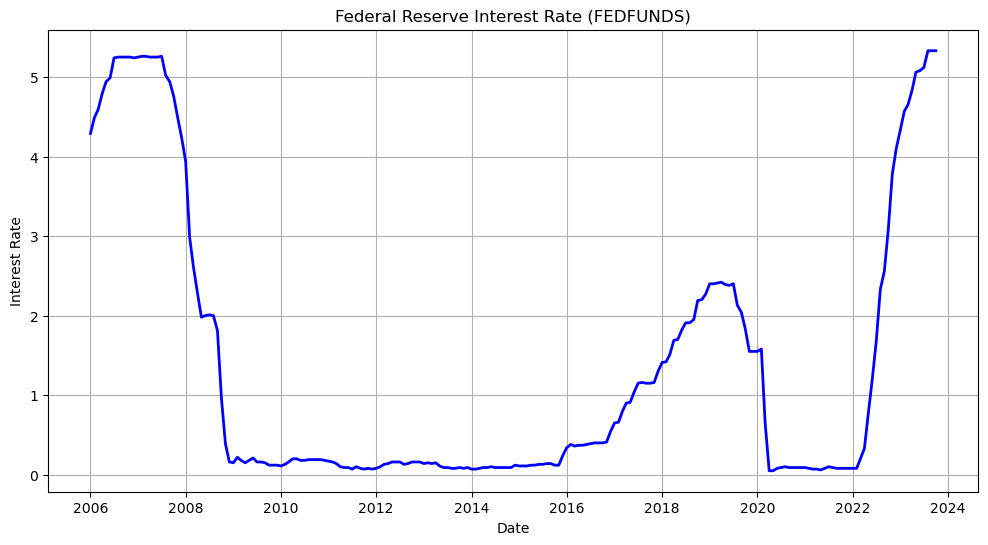

In [12]:
def plot_fed_interest_rate(start_date, end_date):
    fed_interest_rate_data = fetch_fed_interest_rate(start_date, end_date)

    if fed_interest_rate_data is not None:
        # Plot Federal Reserve interest rate (FEDFUNDS)
        plt.figure(figsize=(12, 6))
        plt.plot(fed_interest_rate_data, color='blue', lw=2)
        plt.title('Federal Reserve Interest Rate (FEDFUNDS)')
        plt.xlabel('Date')
        plt.ylabel('Interest Rate')
        plt.grid(True)
        plt.show()
    else:
        print("Failed to fetch Federal Reserve interest rate data.")

# Example usage:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2023, 10, 1)

plot_fed_interest_rate(start_date, end_date)

#Strategy

In [13]:
def first_buy_signals(data, yield_curve_data, money_supply_data):
    # Update the data DataFrame with buy signals
    data['Buy_Signal'] = 0

    position = 0  # Initialize the position variable
    conditions_met = False  # Flag to track whether conditions have been met

    for i in range(1, len(data)):
        date = data.index[i]
        # Check if data points exist for this date in the economic data
        if (date in yield_curve_data.index and date in money_supply_data.index):
            # Check the buy conditions
            if (
                (money_supply_data.at[date, 'M1SL_YoY'] - money_supply_data.at[date, 'M2SL_YoY'] > 0) and
                (yield_curve_data.at[date, 'GS10'] - yield_curve_data.at[date, 'FEDFUNDS'] > 0)
            ):
                if not conditions_met:
                    data.at[date, 'Buy_Signal'] = 1  # Buy Signal
                    conditions_met = True
            else:
                data.at[date, 'Buy_Signal'] = 0  # No Signal
                conditions_met = False


In [14]:
def first_sell_signals(data, yield_curve_data, inflation_data):
    # Update the data DataFrame with sell signals
    data['Sell_Signal'] = 0

    increasing_rates = False  # Flag to track increasing interest rates

    for i in range(1, len(data)):
        # Check if data points exist for this date in the economic data
        date = data.index[i]
        if date in yield_curve_data.index and date in inflation_data.index:
            # Check if data points exist for the previous date in the economic data (yield_curve_data)
            prev_date = date - pd.DateOffset(months=1)  # Assuming the data frequency is monthly

            if prev_date in yield_curve_data.index:
                current_fedfunds = yield_curve_data.at[date, 'FEDFUNDS']
                prev_fedfunds = yield_curve_data.at[prev_date, 'FEDFUNDS']

                print(f"Date: {date}, Current FEDFUNDS: {current_fedfunds}, Previous FEDFUNDS: {prev_fedfunds}")

                # Check if FED FUNDS rate is increasing
                if current_fedfunds > prev_fedfunds and not increasing_rates:
                    increasing_rates = True

                # Check the sell conditions
                if (
                    inflation_data.at[date, 'Annual_Change'] > 2 and
                    increasing_rates
                ):
                    data.at[date, 'Sell_Signal'] = 1  # Sell Signal
                    print(f"Sell condition met on date: {date}")  # Print the date
                    # break  # Stop looking for additional sell signals after the first one


In [15]:
def combined_strategy(data, yield_curve_data, inflation_data, money_supply_data):
    # Update the data DataFrame with buy and sell signals
    data['Buy_Signal'] = 0
    data['Sell_Signal'] = 0

    position = 0  # Initialize the position variable
    conditions_met = False  # Flag to track whether buy conditions have been met

    for i in range(1, len(data)):
        date = data.index[i]

        # Check if data points exist for this date in the economic data
        if (
            date in yield_curve_data.index
            and date in money_supply_data.index
            and date in inflation_data.index
        ):
            # Check the combined conditions
            if (
                (money_supply_data.at[date, 'M1SL_YoY'] - money_supply_data.at[date, 'M2SL_YoY'] > 0)
                and (yield_curve_data.at[date, 'GS10'] - yield_curve_data.at[date, 'FEDFUNDS'] > 0)
                and (inflation_data.at[date, 'Annual_Change'] > 2)
            ):
                if not conditions_met:
                    data.at[date, 'Buy_Signal'] = 1  # Buy Signal
                    conditions_met = True
                    position = 1  # Open a buy position
                else:
                    data.at[date, 'Buy_Signal'] = 0  # No Signal
            else:
                data.at[date, 'Buy_Signal'] = 0  # No Signal
                conditions_met = False

            # Check if a buy position is open
            if position == 1:
                current_fedfunds = yield_curve_data.at[date, 'FEDFUNDS']
                prev_date = date - pd.DateOffset(months=1)  # Assuming the data frequency is monthly

                if (
                    prev_date in yield_curve_data.index
                    and current_fedfunds < yield_curve_data.at[prev_date, 'FEDFUNDS']
                ):
                    # The Federal Funds rate is decreasing; consider selling
                    data.at[date, 'Sell_Signal'] = 1  # Sell Signal
                    position = 0  # Close the buy position


#Graph

In [16]:
def plot_candlestick_with_signals(data):
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

    buy_signals = data[data['Buy_Signal'] == 1]
    sell_signals = data[data['Sell_Signal'] == 1]

    if not buy_signals.empty:
        fig.add_trace(go.Scatter(
            x=buy_signals.index,
            y=buy_signals['Low'] - 5,  # Adjust the vertical position of the '^' markers
            mode='markers',
            marker=dict(symbol='triangle-up', size=10, color='blue'),
            name='Buy Signals'
        ))

    if not sell_signals.empty:
        fig.add_trace(go.Scatter(
            x=sell_signals.index,
            y=sell_signals['High'] + 5,  # Adjust the vertical position of the 'v' markers
            mode='markers',
            marker=dict(symbol='triangle-down', size=10, color='red'),
            name='Sell Signals'
        ))

    fig.update_layout(title='Candlestick Chart with Buy and Sell Signals',
                      yaxis_title='Price',
                      yaxis2=dict(title='Signal', overlaying='y', side='right'))

    fig.show()


#Main()

In [17]:
def main():
    # Define the date range for data retrieval
    start_date = '2007-01-01'
    end_date = '2023-10-01'
    ticker = "SPY"

    yield_curve_data = fetch_yield_curve(start_date, end_date)
    unemployment_data = fetch_unemployment_data(start_date, end_date)
    inflation_data = fetch_cpi_annual_change(start_date, end_date)
    money_supply_data = fetch_money_supply(start_date, end_date)

    # Fetch the stock data
    tick = yf.download(ticker, start=start_date, end=end_date)

    # Align the stock data with the economic data
    data = tick.copy()

    # # Generate first buy signals
    # first_buy_signals(data, yield_curve_data, money_supply_data)

    # # Generate first sell signals
    # first_sell_signals(data, yield_curve_data, inflation_data)

    # Generate first buy and sell signals
    combined_strategy(data, yield_curve_data, inflation_data, money_supply_data)

    # Plot candlestick chart with buy signals
    plot_candlestick_with_signals(data)

if __name__ == "__main__":
    main()

[*********************100%%**********************]  1 of 1 completed


NameError: name 'go' is not defined

#Performance Metric

In [ ]:
def calculate_sortino_ratio(data):
    returns = data['SPY_Return']
    downside_returns = returns[returns < 0]
    average_return = returns.mean()
    downside_deviation = downside_returns.std()
    sortino_ratio = (average_return - 0) / downside_deviation
    return sortino_ratio

In [ ]:
def calculate_sharpe_ratio(data):
    returns = data['SPY_Return']
    risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
    excess_returns = returns - risk_free_rate
    excess_return_mean = excess_returns.mean()
    excess_return_std = excess_returns.std()
    sharpe_ratio = excess_return_mean / excess_return_std
    return sharpe_ratio


In [18]:
def calculate_calmar_ratio(data):
    returns = data['SPY_Return']
    max_drawdown = calculate_max_drawdown(returns)
    annualized_return = (returns.mean() + 1) ** 12 - 1  # Assuming monthly data
    calmar_ratio = annualized_return / abs(max_drawdown)
    return calmar_ratio


In [19]:
def calculate_profit_factor(data):
    positive_returns = data[data['SPY_Return'] > 0]['SPY_Return']
    negative_returns = data[data['SPY_Return'] < 0]['SPY_Return']
    total_profit = positive_returns.sum()
    total_loss = abs(negative_returns.sum())
    profit_factor = total_profit / total_loss
    return profit_factor


In [20]:
def calculate_max_drawdown(returns):
    cumulative_returns = (returns + 1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown


In [21]:
def main():
    # Define the date range for data retrieval
    start_date = '2007-01-01'
    end_date = '2023-10-01'
    ticker = "SPY"

    yield_curve_data = fetch_yield_curve(start_date, end_date)
    unemployment_data = fetch_unemployment_data(start_date, end_date)
    inflation_data = fetch_cpi_annual_change(start_date, end_date)
    money_supply_data = fetch_money_supply(start_date, end_date)

    # Fetch the stock data
    tick = yf.download(ticker, start=start_date, end=end_date)

    # Align the stock data with the economic data
    data = tick.copy()

    # Generate first buy and sell signals
    combined_strategy(data, yield_curve_data, inflation_data, money_supply_data)

    # Plot candlestick chart with buy signals
    plot_candlestick_with_signals(data)

    # Calculate performance metrics
    data['SPY_Return'] = data['Adj Close'].pct_change()
    sortino = calculate_sortino_ratio(data)
    sharpe = calculate_sharpe_ratio(data)
    calmar = calculate_calmar_ratio(data)
    profit_factor = calculate_profit_factor(data)

    # Print the performance metrics
    print("Sortino Ratio:", sortino)
    print("Sharpe Ratio:", sharpe)
    print("Calmar Ratio:", calmar)
    print("Profit Factor:", profit_factor)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


NameError: name 'go' is not defined